In [1]:
import numpy as np
import matplotlib.pyplot as plt

from network import Net
from dataset import GraphDataset

import torch as th

from math import floor


Using backend: pytorch


In [2]:
# Recreate validation set
np.random.seed(42)
length = 2400
seq = np.arange(1,length+1)
seq = np.random.choice(seq,size=length,replace=False)
trainratio = 0.8
index = floor(length*trainratio)
valid_idxs = seq[index:]
validset = GraphDataset("data.bin", valid_idxs)

In [3]:
# Network architecture is not saved in state dict
obj_params = {'architecture': {'activation': th.nn.modules.activation.ReLU,
  'n_conv': 1,
  'neuron_ratios': ((3, 2), (200, 100))},
 'batch_size': 32,
 'optimizer_params': {'amsgrad': False,
  'betas': (0.9, 0.9999),
  'lr': 0.01,
  'weight_decay': 0.0025}}

In [4]:
in_feats = 4
net = Net(in_feats=in_feats, **obj_params['architecture'])
state_dict = th.load("model3.pt")
net.load_state_dict(state_dict)

<All keys matched successfully>

In [5]:
_, target, _ = validset[0]
target = target['glabel'].detach().numpy()[valid_idxs-1]
nedges = np.array([graph[0].num_edges() for graph,_,_ in validset])
predicted = [net(a[0]).detach().numpy() for a,_,_ in validset]

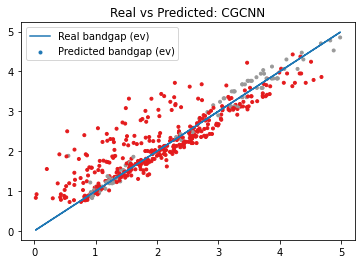

In [8]:
plt.plot(target, target, '-', label='Real bandgap (ev)')
plt.scatter(target, predicted, 
            marker= '.', label='Predicted bandgap (ev)', c = nedges==0, cmap = 'Set1')
plt.legend()
plt.title('Real vs Predicted: CGCNN')
plt.savefig('images/RealVsPredicted', facecolor = 'w', orientation = 'landscape',
           bbox_inches = 'tight')